# Project: Investigate a Dataset - [The Movie Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis
#### Q1: Which months have the most profits come from the movies industry?
#### Q2: How does movies industry profits change over the years?
#### Q3: How does genres control over movies budget?
#### Q4: Does the average vote ratings for movies change over time?
#### Q5: What is the average runtime for movies?

>We will aim to manipulate TMDb dataset to answer these questions


### Loading All Libraries Needed 
>We Start by importing all the libraries needed for our analysis. Pandas for manipulating the Data Frame. Numpy for performing calculatings. Matplotlib.pyplot and SeasBorn for creating some good visualizaions.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>We will take a general look at our dataset and its properties.
>We start by loading our dataset using Pandas.

In [42]:
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

>Here is a view of a small sample of TMDb dataset before wrangling process.

In [43]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [44]:
print('The TMDb dataset has ({}) movies and ({}) columns.'.format(df.shape[0],df.shape[1]))

The TMDb dataset has (10866) movies and (21) columns.


>Checking for Null values in all the 21 columns in our dataset.

In [45]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Here is a general info about the dataset and we will dive in to find what parts of it needs cleaning. **we will take a look at the columns there.**

In [46]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


### Data Cleaning
> We took a look at our dataset, now we have to take some actions by cleaning our data to be more reliable and useful before analysis and answering questions.
 

### Columns with missing values

>A code is written here with organised form to show which columns has **missing values** and how many values are missng.
>We will not take any action now with any null values, I will explain later why.


In [47]:
missed_values=df.isnull().sum()
columns=df.columns
for x,y in zip(columns,missed_values):
    if y != 0:
        print('Column {} has ({}) missing values.'.format(x,y))
print('While the rest of columns has no missing values.')

Column imdb_id has (10) missing values.
Column cast has (76) missing values.
Column homepage has (7930) missing values.
Column director has (44) missing values.
Column tagline has (2824) missing values.
Column keywords has (1493) missing values.
Column overview has (4) missing values.
Column genres has (23) missing values.
Column production_companies has (1030) missing values.
While the rest of columns has no missing values.


### Checking duplicates

>Checking duplicates is a very important step in cleaning process before moving forward to analysis.


In [48]:
print('There are ({}) duplicate rows in TMDb dataset.'.format(sum(df.duplicated())))

There are (1) duplicate rows in TMDb dataset.


### Removing duplicates

>After finding 1 duplicate row in our dataset, now we will take an action by dropping this row.


In [49]:
df.drop_duplicates(inplace=True)
print('After droping duplicates, there are ({}) duplicate rows in TMDb dataset.'.format(sum(df.duplicated())))

After droping duplicates, there are (0) duplicate rows in TMDb dataset.


### Checkpoint 1

>Saving data and keeping old versions is a very good and effective way. we may need to look at our dataset at some point.
>So we will have some **checkpoints** every while.

In [50]:
df.to_csv('tmdb_v1.csv', index=False)
df_v1=pd.read_csv('tmdb_v1.csv')

### Columns to drop

>here we go again for the columns with missing values. we found that there are many columns have many missing values.
>for example, a column like **'home_page'** has more than **7000** missing values. so it's not effective nor fair analysis will be after removing rows of missing values.
>instead we find that there are some columns that will not be any useful with our analysis, so an action was took to **drop** these columns.


In [51]:
df_v1.drop(['id','imdb_id','homepage','tagline','keywords','overview','production_companies'],axis=1,inplace=True)
df_v1.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Columns with missing values again

>After dropping columns that will be no longer useful to our analysis, we will check again on the **missing values**.


In [52]:
df_v1.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

### Columns free of missing values

>Now we find very few missing values. our dataset will no be affected if we remove them.
>We will remove them and check after for one last time.


In [53]:
df_v1.dropna(axis=0,inplace=True)
df_v1.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

### Checkpoint 2

>Saving data and keeping old versions is a very good and effective way. we may need to look at our dataset at some point.
>So we will have some **checkpoints** every while.

In [54]:
df_v1.to_csv('tmdb_v2.csv', index=False)
df_v2=pd.read_csv('tmdb_v2.csv')

### Data types

>Data types can be so tricky. they have to be consistent. otherwise, our analysis can be negatively affected. We will take a look at **data types**.

In [55]:
df_v2.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

### Fixing data types
>In 'budget_adj' and 'revenue_adj' columns '_adj' show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>We need to match data types with 'budget' and 'revenue'.

In [56]:
df_v2['budget_adj'] = df_v2['budget_adj'].astype('int')
df_v2['revenue_adj'] = df_v2['revenue_adj'].astype('int')

### Fixing data types
>After fixing 'budget_adj' and 'revenue' we will take a look at 'release_date' column. This column is in a string format.
>But we will not convert it into date format. Instead, we will extract only the month as we have another column for years called 'release_year'.

In [57]:
df_v2['release_date'] = df_v2['release_date'].apply(lambda x: x.split("/")[0])

### Fixing data types
>Now we extracted months from 'release_date' column, we will take a step into converting these values from str to int.

In [58]:
df_v2['release_date'] = df_v2['release_date'].astype('int')

### Renaming column
>Everything seems ok but only one thing. a column containing the release month of movies cannot be represented as 'release_date'. we will rename this column to be 'release_month' instead.

In [59]:
df_v2.rename(columns={'release_date':'release_month'},inplace=True)

### Fixing data types
>Another column needs to fix its type, 'release_year' columns is in str type and now we will convert it to int.

In [60]:
df_v2['release_year'] = df_v2['release_year'].astype('int')
df_v2['release_year'].describe().astype('int')

count    10731
mean      2001
std         12
min       1960
25%       1995
50%       2006
75%       2011
max       2015
Name: release_year, dtype: int64

### Checking data types
>Take a look first at some good info about 'release_year' column. we find that our list begins at year 1960 and ends at 2015.
>Now we will make sure that all columns have a compatibale type then we proceed.

In [61]:
df_v2.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_month       int64
vote_count          int64
vote_average      float64
release_year        int64
budget_adj          int64
revenue_adj         int64
dtype: object

### Checkpoint 3

>Saving data and keeping old versions is a very good and effective way. we may need to look at our dataset at some point.
>So we will have some **checkpoints** every while.

In [62]:
df_v2.to_csv('tmdb_v3.csv', index=False)
df_v3=pd.read_csv('tmdb_v3.csv')

### Splitting column

>'genres' columns has more than one genre in one column, this will lead to a confusion when it comes to analysis. for example lets say we want to know how many action movies released in year 2006? this will be not easy to know.
>So we will take an action to split this column to 3 columns: 'main_genre', 'sub_genre_1' and 'sub_genre_2'.
>If 'genres' column has more than 3 genres, so the first 3 only will be only included in new columns respectively and the rest will be dropped off our dataset.
>If 'genres' has only 1 or 2 genre, so 'sub_genre_1' and 'sub_genre_2' will have a value of 'none' instead of being NaN.

In [63]:
# splitting genres into 3 columns
new = df_v3["genres"].str.split("|", n = 3, expand = True)
df_v3["main_genre"]= new[0]
df_v3["sub_genre_1"]= new[1]
df_v3["sub_genre_2"]= new[2]
df_v3.loc[:,['main_genre','sub_genre_1','sub_genre_2']].head(1)

,main_genre,sub_genre_1,sub_genre_2
0,Action,Adventure,Science Fiction


### Splitting column

>Like 'genres' column, 'cast' column has more than one actor in one column.
>So we will take an action to split this column to 3 columns like we did before: 'actor_1', 'actor_2' and 'actor_3'.
>If 'cast' column has more than 3 actors/actresses, so the first 3 only will be only included in new columns respectively and the rest will be dropped off our dataset.
>If 'cast' has only 1 or 2 actors, so 'actor_1' and 'actor_2' will have a value of 'none' instead of being NaN.

In [64]:
#splitting cast in 3 columns
new_cast = df_v3["cast"].str.split("|", n = 3, expand = True)
df_v3["actor_1"]= new_cast[0]
df_v3["actor_2"]= new_cast[1]
df_v3["actor_3"]= new_cast[2]
df_v3.loc[:,['actor_1','actor_2','actor_3']].head(3)

,actor_1,actor_2,actor_3
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne
2,Shailene Woodley,Theo James,Kate Winslet


### Dropping columns

>We splitted both 'genres' and 'cast' columns. we are no longer in need of them. so lets clean our dataset by dropping them.

In [65]:
df_v3.drop(['genres','cast'],axis=1,inplace=True)

### Fixing NaN values

>After splitting columns in 3, some of the movies only has 1 genre and some only has 2. They are not missing values after all. they are just like that. so we have to fill the NaN values with something more readable. lets put 'none' instead.

In [66]:
df_v3.fillna('none',inplace=True)

### Rearranging columns

>By looking at the dataset, we find that the first column is 'popularity'. Our dataset is about movies, so it has to start with the movie title.
>And it needs to be more organised by rearranging the columns in more compact and readable way.

In [67]:
df_v3_1=df_v3.loc[:,['original_title','director','runtime','vote_average','vote_count','release_year','release_month','popularity',
                     'budget','budget_adj','revenue','revenue_adj','main_genre','sub_genre_1','sub_genre_2','actor_1',
                     'actor_2','actor_3']]

### Checkpoint 4

>Saving data and keeping old versions is a very good and effective way. we may need to look at our dataset at some point.
>So we will have some **checkpoints** every while.

In [68]:
df_v3_1.to_csv('tmdb_v4.csv', index=False)
df_v4=pd.read_csv('tmdb_v4.csv')

### Re-checking
>lets check again for duplicates, find if we did any mistake by mistake.

In [69]:
print('After cleaning dataset, there are ({}) duplicate rows in TMDb dataset.'.format(sum(df_v4.duplicated())))

After cleaning dataset, there are (0) duplicate rows in TMDb dataset.


### Data shape
>Now we come this far, lets take a look at the volume of our dataset.

In [70]:
print('After cleaning, TMDb dataset has ({}) movies and ({}) columns.'.format(df_v4.shape[0],df_v4.shape[1]))

After cleaning, TMDb dataset has (10731) movies and (18) columns.


<a id='eda'></a>
## Exploratory Data Analysis

>We now are going to do some statistics and visualisations to find trends that might answer the research questions we have. Our dataset is ready for this step. 


### Q1: Which months have the most profits come from the movies industry?

>Is there any remarkable months where more movies are produced? Can we see if certain months attract people more than others? We are hoping to find trends to answer these questions and make conclusions about it.

>Firstly, we filter the movies where has budget and revenue more than 10000 to make a fair comparisons. Then we calculate the **profit** by calculating the difference between **revenue** and **budget**. We also divide the value of both columns by 1 million to be more readable on graph.

In [71]:
# creating new dataframe where budget and revenue more than > 10000
budg_rev=df_v4[df_v4['budget'] > 10000]
budg_rev=budg_rev[budg_rev['revenue'] > 10000]
# creating new column called profit
budg_rev['profit']=budg_rev['revenue']/1000000-budg_rev['budget']/1000000

>We are going to calculate the sum of the profit for each month and then plotting our graph in a bar plot to show the difference between months in profit.

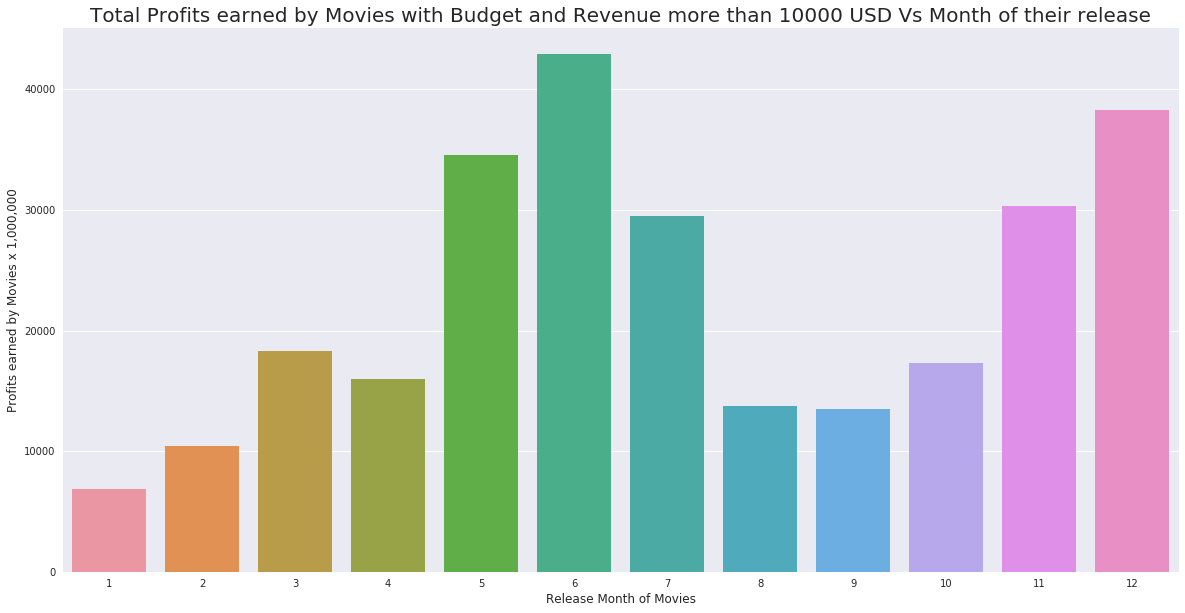

In [72]:
budg_rev=budg_rev.groupby(['release_month']).profit.sum()
plt.figure(figsize = (20, 10))
# showing total profit for each month on bar plot
sns.barplot(budg_rev.index,budg_rev)
# showing title
plt.title('Total Profits earned by Movies with Budget and Revenue more than 10000 USD Vs Month of their release',fontsize=20)
# on x-axis
plt.xlabel('Release Month of Movies', fontsize = 12)
# on y-axis
plt.ylabel('Profits earned by Movies x 1,000,000', fontsize = 12)
plt.show();

>We can see that both **June** (6) and **December** (12) make a big difference. we can refer whys and some more details in conclustions section.<li><a href="#conclusion 1">Conclusion 1</a></li>

### Q2: How does movies industry profits change over the years?

>Movies indsutry has become so hot in the 2000s. Has profit changed over the years? we hope we can find an answer for that question in our analysis.

>Firstly, we filter the movies where has budget and revenue more than 10000 to make a fair comparisons. Then we calculate the **profit** by calculating the difference between **revenue** and **budget**. We also divide the value of both columns by 1 million to be more readable on graph. Same as we did in the past analysis.

In [73]:
# creating new dataframe where budget and revenue more than > 10000
budg_rev=df_v4[df_v4['budget'] > 10000]
budg_rev=budg_rev[budg_rev['revenue'] > 10000]
# creating new column called profit
budg_rev['profit']=budg_rev['revenue']/1000000-budg_rev['budget']/1000000

>We are going to calculate the sum of the profit for each month and then plotting our graph in a line plot to show the change of profits over the years and if and how it changed in a notable form.

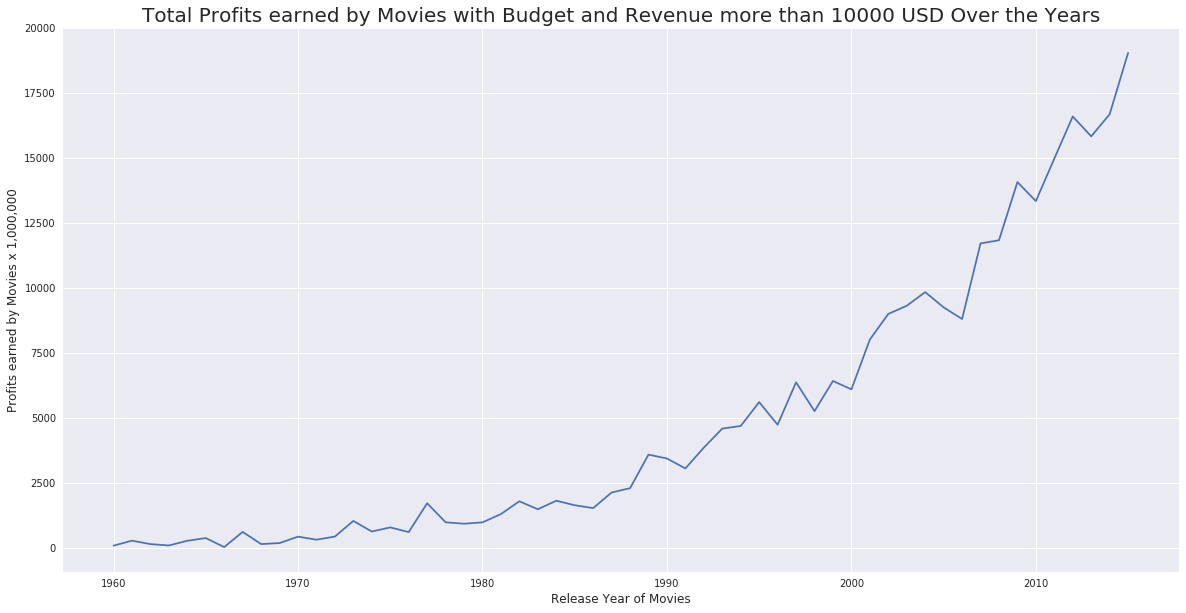

In [74]:
budg_rev=budg_rev.groupby(['release_year']).profit.sum()
plt.figure(figsize = (20, 10))
plt.xlabel('Release Year of Movies', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies x 1,000,000', fontsize = 12)
#title of the line plot
plt.title('Total Profits earned by Movies with Budget and Revenue more than 10000 USD Over the Years',fontsize=20)
plt.plot(budg_rev)
plt.show();

>It is very obvious that profits from movies industy has increased exponentially over the years.<li><a href="#conclusion 2">Conclusion 2</a></li>

### Q3: How does genres control over movies budget?

>What genres have the most budget put for the production of the movies? and does really genres control over movies budget? lets explore and see what we can find.

>We will perform our analysis on **main genres** column as it will be efficent. By grouping the total of budget spent on movies by main genre, we will start plotting our pie chart.

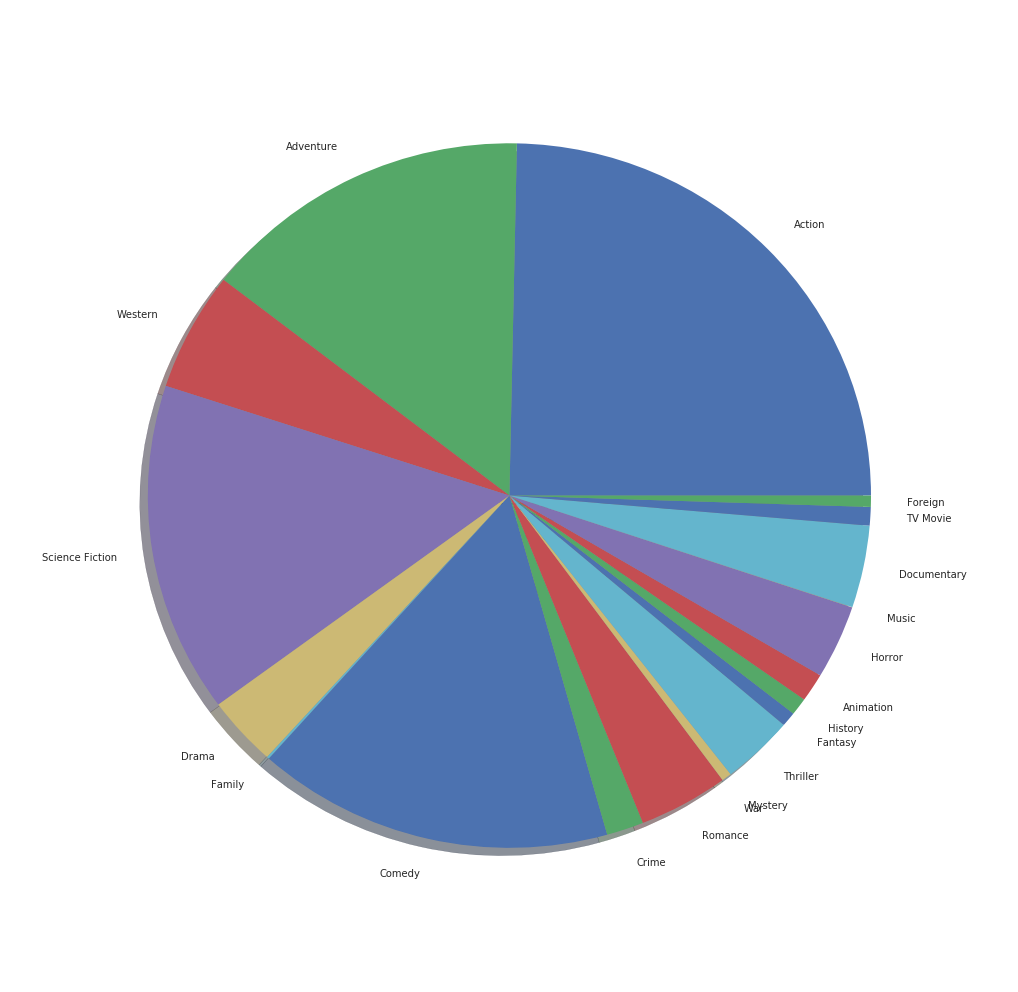

In [75]:
budgbyg=df_v4.groupby(['main_genre'])['budget'].sum()
plt.figure(figsize = (18, 18))
genre_labels=df_v4['main_genre'].unique()
# showing budget distribution using pie chart
plt.pie(budgbyg,labels=genre_labels,textprops = {'fontsize': 10}, shadow=True,radius=0.9)
plt.show();

>By looking at the pie chart we find that Action genre above all has the most total budget spent, while we can see that genres like Adventure, Science fiction and Comedy has been one of the tops.<li><a href="#conclusion 3">Conclusion 3</a></li>

>After showing a pie chart for genres, we will give another bar chart for this analysis which maybe more visualised.

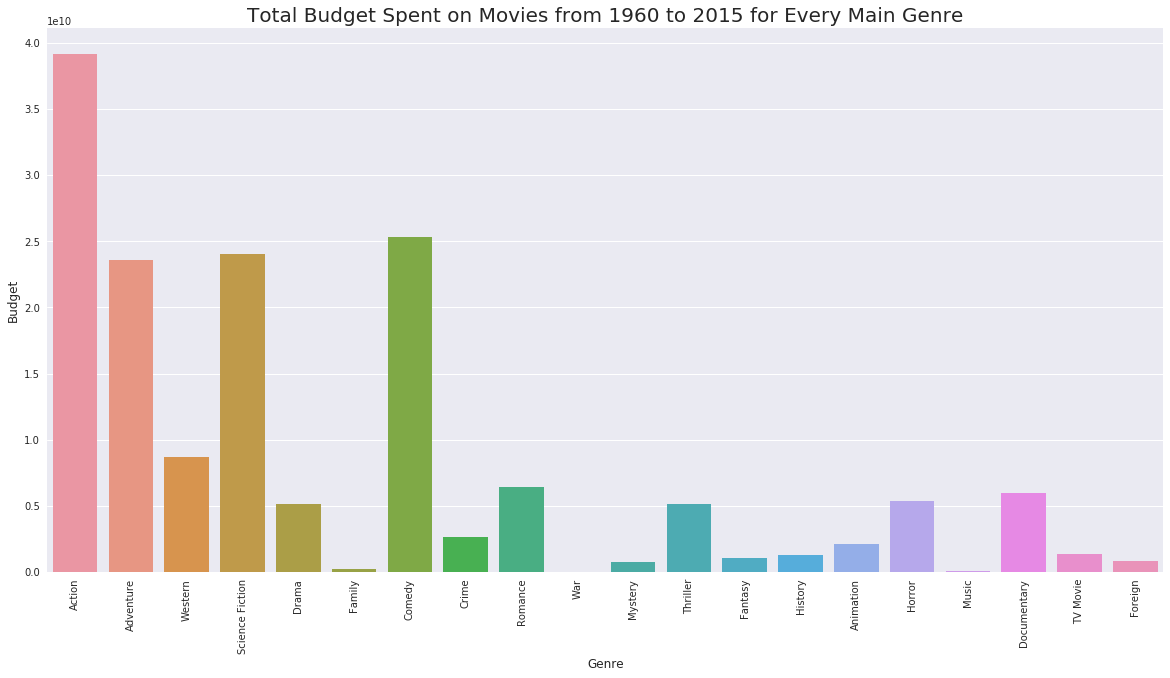

In [76]:
genres=df_v4['main_genre'].unique()
plt.figure(figsize = (20, 10))
# rotating genres to be vertical
plt.xticks(rotation='vertical')
sns.barplot(x=genres, y=budgbyg, order=genres)
# showing titles
plt.title('Total Budget Spent on Movies from 1960 to 2015 for Every Main Genre',fontsize=20)
# on x-axis
plt.xlabel('Genre',fontsize=12)
# on y-axis
plt.ylabel('Budget',fontsize=12)
plt.show();

>It seems clearer now the gap between Action movies genre and other movie genres.

### Q4: How does the average vote ratings for movies change over time?

>Does the quality of movies change over time and people tend to like movies nowadays more than old movies? lets find out.

>We have to filter first the movies that has less than 100 ratings to have a fair analysis.

In [77]:
morethan100= df_v4[df_v4['vote_count'] >= 100]
morethan100['vote_count'].count()

3326

>There are 3326 movies now available for our analysis, we will have another a line graph to show us how votings changeed over years, We calculate the average vote rating and group it by the release year of movies, then plot it.

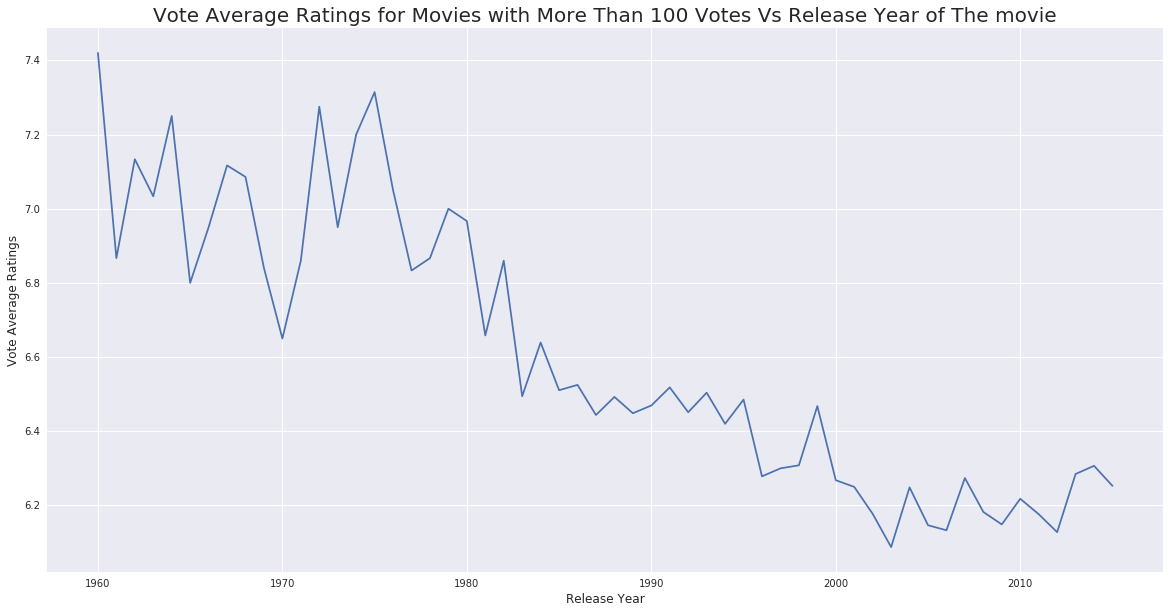

In [78]:
votebyyear=morethan100.groupby(['release_year']).vote_average.mean()
plt.figure(figsize = (20, 10))
# displaying line plot
plt.plot(votebyyear.index,votebyyear)
# on x-axis
plt.xlabel('Release Year', fontsize = 12)
# on y-axis
plt.ylabel('Vote Average Ratings', fontsize=12)
# showing title
plt.title('Vote Average Ratings for Movies with More Than 100 Votes Vs Release Year of The movie', fontsize=20)
plt.show();

>We find out that the average ratings has decreased over time, is there any reason for it?<li><a href="#conclusion 4">Conclusion 4</a></li>

### Q5: What is the average runtime for movies?

>Movies have an average range of runtime, let see how can we find it.

>We will use a box plot to observe the distribution of the runtime of all movies in our dataset.

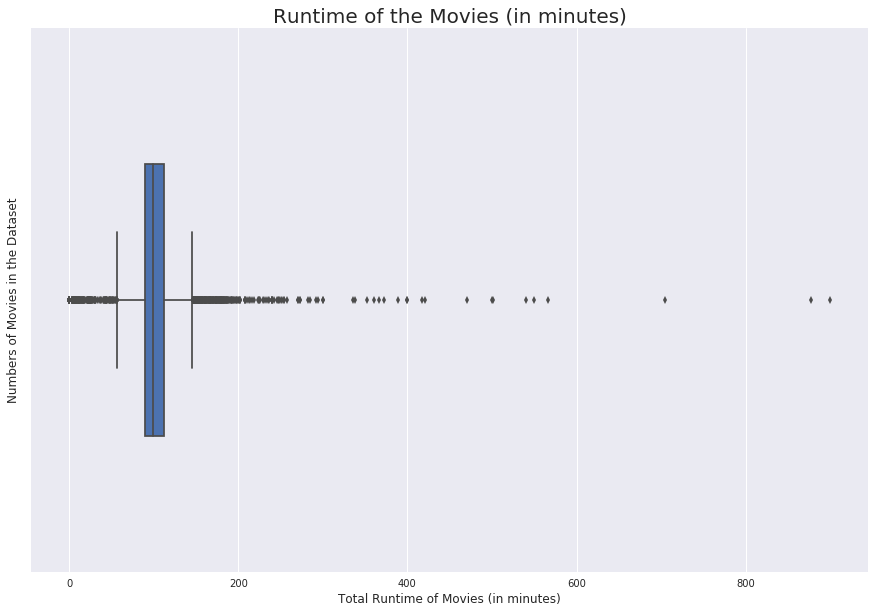

The average runtime of movies is 102 minutes.


In [79]:
plt.figure(figsize=(15,10))
# showing data on boxplot
sns.boxplot(df_v4['runtime'],saturation=1,width=0.5,fliersize=5)
# on x-axis
plt.xlabel('Total Runtime of Movies (in minutes)', fontsize = 12)
# on y-axis
plt.ylabel('Numbers of Movies in the Dataset', fontsize=12)
# showing title
plt.title('Runtime of the Movies (in minutes)', fontsize=20)
plt.show(); print('The average runtime of movies is {} minutes.'.format(df_v4['runtime'].mean().astype('int')))

<a id='conclusions'></a>
## Conclusions
### Results
<a id='conclusion 1'></a>
> **Conclusion 1**: As we mentioned that both **June** (6) and **December** (12) make a big difference when it comes to profits. So lets explain why **June** first. it's not only **June** but mainly summer months, **June** ahead of them. It is when people have most of their vacations and students on holidays from school. so what's better than visitng a beach and going to cinema? When we talk about **December** specially in *USA* and *Europe* where the movies industry shines the most, we have to mention that *Christmas* and *Boxing days* play a role in it, it's the month when producers hold their movies to launch.

<a id='conclusion 2'></a>
> **Conclusion 2**: Movies industry has grown exponentially over the years, and here we can say a lot even if it's actually very obvious. The world has growing over these years. The world has been more like an open book for all cultures and people. Everything is actually growing. So, Movies are not only for entertainment. Movies nowadays work on changing people, the nature of their thinkings and their cultures. They literaly shape our generations. Everybody watch movies.

<a id='conclusion 3'></a>
> **Conclusion 3**: We can see what these movie genres have in common. Action, Science Fiction and Adventure movies are relying a lot on using so many visuals techniques, using several locations overall the worlds, consuming more cast members and double stunt actors, occupying more tools more than Drama and Family movies for example. So these genres consumes a hot budget. And they are what catch the new generations anyways, so why not spend on them?

<a id='conclusion 4'></a>
> **Conclusion 4**: Ratings average for movies has decreased over years, They are actually many reasons for that. But they are main top reasons. First, That most people are nostaligic, they prefer to live in the past and prefer movies from the 1900s rather than 2000s, ignoring the fact which is better. Second, Now many movies are made out only for money with no story or effort in scenarios. This may lead in high profits but less quality.

### Limitations
> 1- Most of our data lacks integrity as for example the budget and revenue columns have many zero values which it is not possible. <br>
> 2- Most of our data are categorical so we don't have a lot of correlations. <br>
> 3- There are not enough recent data which would make a great impact on our analysis.

In [81]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0